In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import  roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [71]:
df_train = pd.read_excel(r"D:\2024.2\HCC\Classification_HCC\Code_HCC\Final_dataset\Merged_HCC (Train_Test) (version 1).xlsx", sheet_name = "Train_mean")

df_train.describe()



,Age,Gender,Leucocytes,Platelets,INR,AST,ALT,Total_Bil,Dir_Bil,Albumin,Creatinine,HBsAg,HCVAb,AFP,AST_ALT_ratio,Obesity,Label_HCC
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,51.946565,0.763359,12.469447,224.936336,1.076967,49.937557,56.533053,24.762253,13.256931,40.351069,115.133527,0.332061,0.030534,367.398201,1.126299,0.244275,0.339695
std,14.360340,0.425834,82.044757,87.294284,0.206536,64.377500,133.629922,55.221291,22.288610,5.317456,510.280512,0.471854,0.172382,2234.936583,0.579079,0.430479,0.474512
min,17.000000,0.000000,2.200000,1.710000,0.840000,3.500000,5.300000,2.200000,1.200000,19.000000,17.680000,0.000000,0.000000,0.200000,0.097200,0.000000,0.000000
25%,41.000000,1.000000,5.500000,179.500000,0.970000,24.985000,25.167500,8.800000,5.500000,37.700000,67.350000,0.000000,0.000000,3.847750,0.723700,0.000000,0.000000
50%,53.000000,1.000000,6.500000,224.500000,1.030000,32.525000,36.000000,11.750000,8.050000,41.260000,78.100000,0.000000,0.000000,4.161169,0.952850,0.000000,0.000000
75%,63.000000,1.000000,8.097500,270.000000,1.117500,52.000000,54.150000,17.275000,13.000000,44.175000,90.300000,1.000000,0.000000,6.337500,1.403100,0.000000,1.000000
max,82.000000,1.000000,1329.000000,561.000000,3.140000,840.000000,2097.000000,491.000000,209.700000,53.020000,8307.000000,1.000000,1.000000,27806.660000,3.566000,1.000000,1.000000


In [72]:
df_test = pd.read_excel(r"D:\2024.2\HCC\Classification_HCC\Code_HCC\Final_dataset\Merged_HCC (Train_Test) (version 1).xlsx", sheet_name = "Test_mean")

df_test.describe()

,Age,Gender,Leucocytes,Platelets,INR,AST,ALT,Total_Bil,Dir_Bil,Albumin,Creatinine,HBsAg,HCVAb,AFP,AST_ALT_ratio,Obesity,Label_HCC
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,43.045802,0.480916,7.085497,250.472519,0.996619,27.788550,30.444733,12.155485,8.448550,42.363817,79.518244,0.106870,0.015267,867.404358,1.204076,0.114504,0.099237
std,12.602724,0.501554,2.324677,57.861118,0.071549,27.062188,39.161991,10.100742,4.255425,3.789334,28.931151,0.310134,0.123084,8969.097066,0.525859,0.319645,0.300127
min,18.000000,0.000000,3.600000,2.900000,0.840000,7.560000,4.900000,1.700000,0.800000,20.200000,46.000000,0.000000,0.000000,0.600000,0.177200,0.000000,0.000000
25%,34.000000,0.000000,5.600000,207.500000,0.950000,18.520000,13.360000,7.700000,5.500000,40.500000,63.460000,0.000000,0.000000,4.161169,0.870350,0.000000,0.000000
50%,42.000000,0.000000,6.500000,249.000000,0.990000,22.430000,20.800000,9.790000,7.200000,42.840000,75.440000,0.000000,0.000000,4.161169,1.146400,0.000000,0.000000
75%,51.000000,1.000000,8.020000,282.500000,1.040000,28.700000,32.020000,12.650000,10.300000,44.510000,89.755000,0.000000,0.000000,4.161169,1.391900,0.000000,0.000000
max,80.000000,1.000000,16.750000,465.000000,1.240000,296.000000,398.000000,99.800000,25.000000,53.620000,348.860000,1.000000,1.000000,102458.000000,3.087000,1.000000,1.000000


In [73]:
df_test.columns

Index(['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb',
       'AFP', 'AST_ALT_ratio', 'Obesity', 'Label_HCC'],
      dtype='object')

In [74]:
columns = []
# 16 đặc trưng
selected_columns = ['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Tol_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb', 'AFP',
       'AST_ALT_ratio', 'Obesity', 'Label_HCC']
# RFE 10 đặc trưng
selected_columns_rfe = ['Age', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT', 'Total_Bil', 'Albumin', 'HBsAg', 'AFP']
# RF 10 đặc trưng
selected_columns_rf = ['AFP', 'INR', 'Platelets', 'AST', 'Albumin', 'Age',   'HBsAg', 'Total_Bil',  'Leucocytes', 'ALT']
# XGB 14 đặc trưng
selected_columns_xgb = ['AFP', 'INR', 'AST', 'Platelets', 'Total_Bil', 'Albumin', 'HBsAg', 'Dir_Bil', 'Age', 'Creatinine', 'Leucocytes', 'ALT', 'Gender', 'AST_ALT_ratio']

data_train = df_train.copy()
data_test = df_test.copy()

1. RFE_XGB

In [75]:
X_train_1 = data_train[selected_columns_rfe]
y_train_1 = data_train.Label_HCC
X_test_1 = data_test[selected_columns_rfe]
y_test_1 = data_test.Label_HCC

In [76]:
X_train_1.columns

Index(['Age', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT', 'Total_Bil',
       'Albumin', 'HBsAg', 'AFP'],
      dtype='object')

In [77]:

pipeline_rfe_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(learning_rate = 0.07,max_depth = 4,min_child_weight = 1,  n_estimators=150, n_jobs = -1, random_state=1))
])

pipeline_rfe_xgb.fit(X_train_1, y_train_1)
y_pred_1 = pipeline_rfe_xgb.predict(X_test_1)

accuracy = accuracy_score(y_test_1, y_pred_1)
precision = precision_score(y_test_1, y_pred_1)
recall = recall_score(y_test_1, y_pred_1)
f1 = f1_score(y_test_1, y_pred_1)

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


Accuracy : 0.98
Precision: 0.92
Recall   : 0.92
F1-score : 0.92


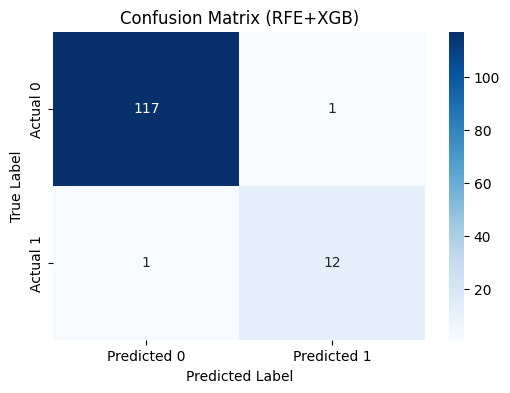

True Negative (TN): 117
False Positive (FP): 1
False Negative (FN): 1
True Positive (TP): 12


In [78]:
cm = confusion_matrix(y_test_1, y_pred_1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (RFE+XGB)")
plt.show()

TN, FP, FN, TP = cm.ravel()

print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")


2. RF-FI + XGB

In [79]:
X_train_2 = data_train[selected_columns_rf]
y_train_2 = data_train.Label_HCC
X_test_2  = data_test[selected_columns_rf]
y_test_2 = data_test.Label_HCC

In [80]:
X_train_2.columns

Index(['AFP', 'INR', 'Platelets', 'AST', 'Albumin', 'Age', 'HBsAg',
       'Total_Bil', 'Leucocytes', 'ALT'],
      dtype='object')

In [81]:

pipeline_rf_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(learning_rate = 0.09,max_depth = 5,min_child_weight = 1,  n_estimators=250, n_jobs = -1, random_state=1))
])

pipeline_rf_xgb.fit(X_train_2, y_train_2)
y_pred_2 = pipeline_rf_xgb.predict(X_test_2)

accuracy = accuracy_score(y_test_2, y_pred_2)
precision = precision_score(y_test_2, y_pred_2)
recall = recall_score(y_test_2, y_pred_2)
f1 = f1_score(y_test_2, y_pred_2)

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


Accuracy : 0.98
Precision: 0.92
Recall   : 0.85
F1-score : 0.88


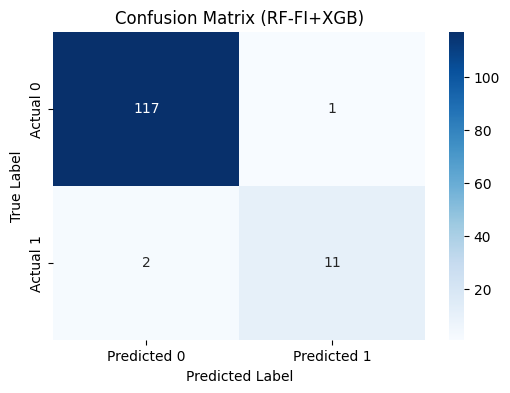

True Negative (TN): 117
False Positive (FP): 1
False Negative (FN): 2
True Positive (TP): 11


In [82]:
cm = confusion_matrix(y_test_2, y_pred_2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (RF-FI+XGB)")
plt.show()

TN, FP, FN, TP = cm.ravel()

print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")


3. XGB-FI + XGB

In [83]:
X_train_3 = data_train[selected_columns_xgb]
y_train_3 = data_train.Label_HCC
X_test_3 = data_test[selected_columns_xgb]
y_test_3 = data_test.Label_HCC

In [84]:

pipeline_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(learning_rate = 0.03,max_depth = 4,min_child_weight = 1,  n_estimators=100, n_jobs = -1, random_state=1))
])

pipeline_xgb.fit(X_train_3, y_train_3)
y_pred_3 = pipeline_xgb.predict(X_test_3)

accuracy = accuracy_score(y_test_3, y_pred_3)
precision = precision_score(y_test_3, y_pred_3)
recall = recall_score(y_test_3, y_pred_3)
f1 = f1_score(y_test_3, y_pred_3)

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


Accuracy : 0.96
Precision: 0.75
Recall   : 0.92
F1-score : 0.83


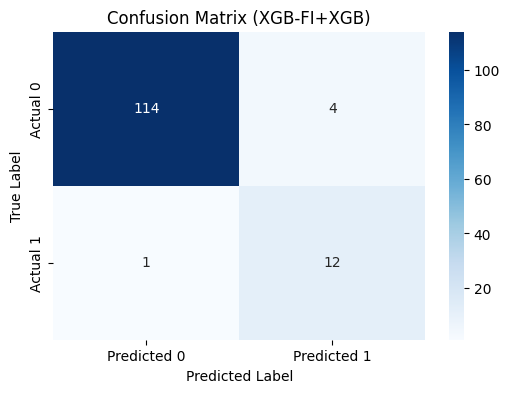

True Negative (TN): 114
False Positive (FP): 4
False Negative (FN): 1
True Positive (TP): 12


In [85]:
cm = confusion_matrix(y_test_3, y_pred_3)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (XGB-FI+XGB)")
plt.show()

TN, FP, FN, TP = cm.ravel()

print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")
